In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv("Math_Final_CSV_cleaned.csv")

# User input
user_skills_input = input("Please enter your skills (comma-separated): ")

# Processing user skills
#Input is processed into a list of strings and converted to uppercase
processed_user_skills = [skill.strip().upper() for skill in user_skills_input.split(',')]
print(processed_user_skills)


# Calculate similarity Score using Cosine Similarity


def calculate_skill_similarity_cosine(user_skills, data_skills_str):
    #"""Calculates the cosine similarity between user skills and data skills."""
    try:
        # Safely evaluate the string representation of the list and join into a single string
        data_skills_list = eval(data_skills_str)
        if isinstance(data_skills_list, list):
            data_skills_processed = ' '.join([skill.strip().upper() for skill in data_skills_list])
        else:
            data_skills_processed = '' # Handle cases where eval doesn't return a list
    except (SyntaxError, TypeError):
        data_skills_processed = '' # Handle cases where data_skills_str is not a valid string representation of a list

    user_skills_processed = ' '.join(user_skills)


    # Create a CountVectorizer to convert skills into vectors


    vectorizer = CountVectorizer().fit_transform([user_skills_processed, data_skills_processed])
    vectors = vectorizer.toarray()

    # Calculate cosine similarity
    cosine_sim = cosine_similarity(vectors)

    return cosine_sim[0, 1]


# Determining Acceptance Score using Cosine Similarity


df['skill_similarity_score_cosine'] = df['skills'].apply(lambda x: calculate_skill_similarity_cosine(processed_user_skills, x))
display(df[['name', 'skills', 'skill_similarity_score_cosine']].head(7))

# Create a copy to avoid SettingWithCopyWarning
accepted_applications_df_cosine = df[df['skill_similarity_score_cosine'] >= 0.25].copy()

# Displaying Result

if not accepted_applications_df_cosine.empty:
    print("Application Accepted: At least one match found with 85% or higher skill similarity!!")
    # Function to find matched skills
    def find_matched_skills(user_skills, data_skills_str):
        try:
            data_skills_list = eval(data_skills_str)
            if isinstance(data_skills_list, list):
                data_skills_processed = [skill.strip().upper() for skill in data_skills_list]
                matched = list(set(user_skills).intersection(data_skills_processed))
                return matched
            else:
                return []
        except (SyntaxError, TypeError):
            return []

    accepted_applications_df_cosine['matched_skills'] = accepted_applications_df_cosine['skills'].apply(lambda x: find_matched_skills(processed_user_skills, x))

    accepted_applications_df_cosine = accepted_applications_df_cosine.sort_values(by='skill_similarity_score_cosine', ascending=False)

    display(accepted_applications_df_cosine[['name', 'skills', 'matched_skills', 'skill_similarity_score_cosine']])
else:
    print("\nApplication Rejected: No match found with 85% or higher skill similarity!!")
if not accepted_applications_df_cosine.empty:
    print("Top 10 Matched..!!")
    display(accepted_applications_df_cosine[['name', 'skills', 'matched_skills', 'skill_similarity_score_cosine']].head(10))
else:
    print("Application Rejected!!")

Please enter your skills (comma-separated): 'PYTHON', 'MACHINE LEARNING', 'DEEP LEARNING', 'R', 'SQL', 'EXCEL'
["'PYTHON'", "'MACHINE LEARNING'", "'DEEP LEARNING'", "'R'", "'SQL'", "'EXCEL'"]


,name,skills,skill_similarity_score_cosine
0,Rohan,"['BIG DATA', 'HADOOP', 'HIVE', 'PYTHON', 'MAPR...",0.225374
1,Aisha,"['DATA ANALYSIS', 'DATA ANALYTICS', 'BUSINESS ...",0.192450
2,Nisha,"['SOFTWARE DEVELOPMENT', 'MACHINE LEARNING', '...",0.521749
3,Anand,"['ACCOUNTS PAYABLES', 'ACCOUNTS RECEIVABLES', ...",0.042679
4,Vidit,"['ANALYTICAL REASONING', 'COMPLIANCE TESTING K...",0.000000
5,Raj,"['MICROSOFT APPLICATIONS', 'NETWORK SECURITY',...",0.000000
6,Riddhi,"['MACHINE LEARNING', 'LINEAR REGRESSION', 'RID...",0.235702


Application Accepted: At least one match found with 85% or higher skill similarity!!


,name,skills,matched_skills,skill_similarity_score_cosine
2040,Vinay,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
1924,Rakesh,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
9147,Rajat,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
1936,Anaya,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
9176,Amit,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
...,...,...,...,...
7460,Sakshi,"['MACHINE LEARNING', 'DATA ANALYSIS', 'DATA VI...",[],0.251976
6830,Anirudh,"['MACHINE LEARNING', 'DATA ANALYSIS', 'DATA VI...",[],0.251976
1254,Ayaan,"['MACHINE LEARNING', 'DATA ANALYSIS', 'DATA VI...",[],0.251976
9432,Ayush,"['MACHINE LEARNING', 'DATA ANALYSIS', 'DATA VI...",[],0.251976


Top 10 Matched..!!


,name,skills,matched_skills,skill_similarity_score_cosine
2040,Vinay,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
1924,Rakesh,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
9147,Rajat,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
1936,Anaya,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
9176,Amit,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
8620,Neil,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
4771,Akshay,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
8673,Ayushi,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
3769,Pari,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865
8833,Sunny,"['PYTHON', 'MYSQL', 'TENSORFLOW', 'KERAS', 'MA...",[],0.737865


In [ ]:
print(df['name'])

0        Rohan
1        Aisha
2        Nisha
3        Anand
4        Vidit
         ...  
9483    Deepak
9484     Yatin
9485     Kunal
9486    Anjali
9487    Ishita
Name: name, Length: 9488, dtype: object


In [ ]:
df.head()

,name,skills,degree_names,major_field_of_studies,professional_company_names,related_skils_in_job,positions,experience_in_years,matched_score,skill_similarity_score_cosine
0,Rohan,"['BIG DATA', 'HADOOP', 'HIVE', 'PYTHON', 'MAPR...",['B.Tech'],['Electronics'],['Coca-COla'],[['Big Data']],['Big Data Analyst'],1.0,0.850000,0.320713
1,Aisha,"['DATA ANALYSIS', 'DATA ANALYTICS', 'BUSINESS ...","['B.Sc (Maths)', 'M.Sc (Science) (Statistics)']","['Mathematics', 'Statistics']",['BIB Consultancy'],"[['Data Analysis', 'Business Analysis', 'Machi...",['Business Analyst'],5.0,0.750000,0.182574
2,Nisha,"['SOFTWARE DEVELOPMENT', 'MACHINE LEARNING', '...",['B.Tech'],['Electronics/Telecommunication'],['Axis Bank Limited'],"[['Unified Payment Interface', 'Risk Predictio...",['Software Developer (Machine Learning Enginee...,3.0,0.416667,0.494975
3,Anand,"['ACCOUNTS PAYABLES', 'ACCOUNTS RECEIVABLES', ...",['Computer Applications Specialist Certificate...,['Computer Applications'],"['Company Name ï¼ City , State', 'Company Name...","[['accounts receivables', 'banking', 'G/L Acco...","['Accountant', 'Accounts Receivable Clerk', 'M...",2.0,0.760000,0.040489
4,Vidit,"['ANALYTICAL REASONING', 'COMPLIANCE TESTING K...",['Bachelor of Business Administration'],['Accounting'],"['Company Name', 'Company Name', 'Company Name...","[['collections', 'accounts receivable', 'finan...","['Staff Accountant', 'Senior Accountant', 'Tax...",4.0,0.650000,0.000000


In [ ]:
display(df[df['name'] == 'Anya'])

,name,skills,degree_names,major_field_of_studies,professional_company_names,related_skils_in_job,positions,experience_in_years,matched_score,skills_list,skills_doc,skill_similarity_score_cosine,matched_skills
513,Anya,"['PROBLEM RESOLUTION', 'RESULTS-ORIENTED', 'ME...","['High School Diploma', None]","[None, 'General Studies']","['Company Name', 'Company Name', 'Company Name...","[None, None, None, ['Microsoft Office proficie...","['Business Development', 'Service Manager', 'S...",1.0,0.850000,"[PROBLEM RESOLUTION, RESULTS-ORIENTED, METICUL...","PROBLEM RESOLUTION, RESULTS-ORIENTED, METICULO...",0.0000,[]
650,Anya,"['QUICKBOOKS', 'SAGE', 'LACERTE', 'INTUIT PROS...","['Master of Science', 'Bachelor of Science']","['Taxation', 'Accounting']","['Company Name', 'Company Name', 'Company Name...","[['cash receipts', 'A/R', 'A/P', 'notes payabl...","['Accountant', 'Accounting Assistant', 'Stock ...",3.5,0.550000,"[QUICKBOOKS, SAGE, LACERTE, INTUIT PROSERIES, ...","QUICKBOOKS, SAGE, LACERTE, INTUIT PROSERIES, M...",0.0000,[]
684,Anya,"['DATA SCIENCE', 'DATA ANALYSIS', 'DEEP LEARNI...","['B.Tech', 'M.Tech']","['N/A', 'N/A']",['IIT Labs'],"[['Artificial Intelligence', 'Machine Learning...",['Associate Researcher'],3.5,0.350000,"[DATA SCIENCE, DATA ANALYSIS, DEEP LEARNING, M...","DATA SCIENCE, DATA ANALYSIS, DEEP LEARNING, MA...",0.1850,"[DEEP LEARNING, MACHINE LEARNING, PYTHON]"
687,Anya,"['DATA SCIENCE', 'DEEP LEARNING', 'NEURAL NETW...",['B.CA'],['N/A'],['BB House of Developers'],[['Machine Learning']],['Intern Trainee'],5.0,0.350000,"[DATA SCIENCE, DEEP LEARNING, NEURAL NETWORKS,...","DATA SCIENCE, DEEP LEARNING, NEURAL NETWORKS, ...",0.1559,"[DEEP LEARNING, MACHINE LEARNING]"
703,Anya,"['PROENGINEER/CREO', 'MINITAB', 'MS OFFICE SUI...","['Master of Science', 'Bachelor of Arts']","['Mechanical Engineering', 'Physics and Biology']","['Company Name', 'Company Name', 'Company Name...","[['Quality Engineering', 'Compliance', 'NCR In...","['Manager, Quality Engineering', 'Senior Engin...",2.0,0.450000,"[PROENGINEER/CREO, MINITAB, MS OFFICE SUITE, M...","PROENGINEER/CREO, MINITAB, MS OFFICE SUITE, MS...",0.0000,[]
787,Anya,"['DATA ANALYSIS', 'MACHINE LEARNING', 'SCIKIT ...","['B.Tech', 'M.Tech']","['Mechanical', 'Machine Learning']",['Indusoft Pvt Ltd'],"[['Data Analysis', 'Machine Learning', 'Python...",['Junior Data Analyst'],2.0,0.650000,"[DATA ANALYSIS, MACHINE LEARNING, SCIKIT LEARN...","DATA ANALYSIS, MACHINE LEARNING, SCIKIT LEARN,...",0.1295,"[MACHINE LEARNING, PYTHON, SQL]"
792,Anya,"['JAVA', 'C++', 'PYTHON', 'MACHINE LEARNING', ...","['B.Tech', 'M.Tech']","['Computer Science', 'Computer Science Enginee...",['One97 Communications Limited'],"[['YOLO', 'CNN', 'Object-detection', 'OCR']]",['Data Scientist'],1.0,0.850000,"[JAVA, C++, PYTHON, MACHINE LEARNING, ALGORITH...","JAVA, C++, PYTHON, MACHINE LEARNING, ALGORITHM...",0.1506,"[DEEP LEARNING, MACHINE LEARNING, PYTHON]"
911,Anya,"['OPERATIONAL ANALYSIS', 'EXCEPTIONAL TIME MAN...",['Associate of Applied Science'],"['Continuing coursework in Math, History and f...","['Company Name', 'Company Name', 'Company Name...","[['RF systems', 'component level testing', 'ma...","['Engineering Technician/ Field Service', 'Eng...",5.0,0.550000,"[OPERATIONAL ANALYSIS, EXCEPTIONAL TIME MANAGE...","OPERATIONAL ANALYSIS, EXCEPTIONAL TIME MANAGEM...",0.0000,[]
1031,Anya,"['A/P', 'A/R', 'AUTOMATED PAYROLL', 'CPA', 'EX...","['A.A.', 'Diploma']","['Business Management-Accounting', 'Bookkeepin...","['Company Name', 'Company Name', 'Company Name...","[['A/P', 'A/R', 'Bank and account reconciliati...","['Accountant', 'Office Manager/Restaurant Mana...",4.5,0.760000,"[A/P, A/R, AUTOMATED PAYROLL, CPA, EXCEL, GENE...","A/P, A/R, AUTOMATED PAYROLL, CPA, EXCEL, GENER...",0.0295,[EXCEL]
1055,Anya,"['MACHINE LEARNING', 'SOFTWARE DEVELOPMENT', '...",['B.Tech'],['Computer Science'],['HS Institute'],"[['Data Management', 'Machine Learning']]",['Trainee'],6.5,0.683333,"[MACHINE LEARNING, SOFTWARE DEVELOPMENT, TEXT ..

 Cosine similarity doesn't just count the number of matching skills. It measures the cosine of the angle between two vectors in a multi-dimensional space.

Here's why two records with the same number of matched skills can have different cosine similarity scores:

Term Frequency: Cosine similarity considers how often each skill appears in both the user's skill set and the applicant's skill set. If a skill appears more frequently in one set than the other, even with the same number of matches, the vectors will differ, leading to a different cosine similarity.
Vector Direction: The cosine similarity is determined by the angle between the vectors. Even if the number of matching skills is the same, the specific combination and frequency of those skills can result in different vector directions, thus affecting the cosine similarity.

In [ ]:
!pip install rapidfuzz

Enter User Skill: python, machine learning, deep learning, r, sql, excel
Loaded 9488 candidates.
User Skills: ['PYTHON', 'MACHINE LEARNING', 'DEEP LEARNING', 'R', 'SQL', 'EXCEL']


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Application Accepted: At least one match found with a similarity score higher than the threshold!

Top Ranked Candidates:
   name                                                                                       skills_list  skill_similarity_score_cosine                  matched_skills
 Shruti [R, PYTHON, TABLEAU, POWER BI, SQL, SAS, DEEP LEARNING, NEURAL NETWORKS, ARTIFICIAL INTELLIGENCE]                         0.4449 [DEEP LEARNING, PYTHON, R, SQL]
 Devika [R, PYTHON, TABLEAU, POWER BI, SQL, SAS, DEEP LEARNING, NEURAL NETWORKS, ARTIFICIAL INTELLIGENCE]                         0.4449 [DEEP LEARNING, PYTHON, R, SQL]
   Anya [R, PYTHON, TABLEAU, POWER BI, SQL, SAS, DEEP LEARNING, NEURAL NETWORKS, ARTIFICIAL INTELLIGENCE]                         0.4449 [DEEP LEARNING, PYTHON, R, SQL]
  Manan [R, PYTHON, TABLEAU, POWER BI, SQL, SAS, DEEP LEARNING, NEURAL NETWORKS, ARTIFICIAL INTELLIGENCE]                         0.4449 [DEEP LEARNING, PYTHON, R, SQL]
  Nitya [R, PYTHON, TABLEAU, POW

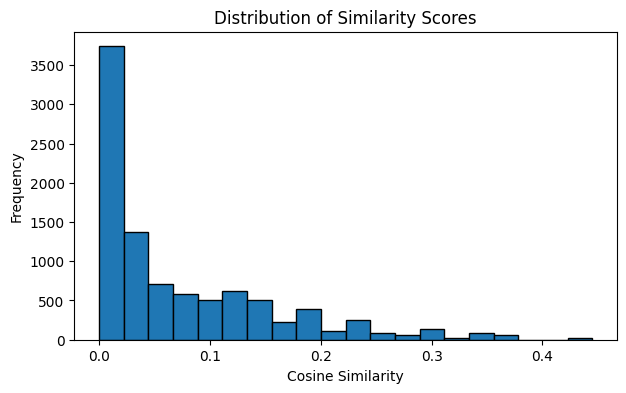

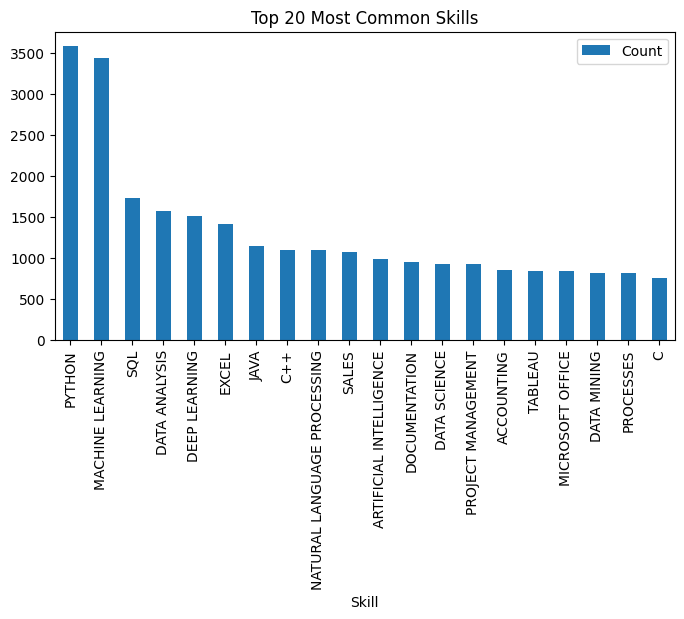

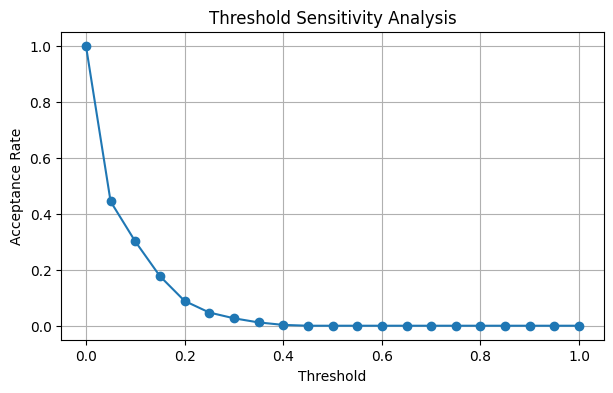

Results saved to accepted_candidates_tfidf.csv and ranked_candidates_tfidf.csv


In [ ]:
 import ast
 from typing import List, Iterable
 import pandas as pd
 import numpy as np
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.metrics.pairwise import cosine_similarity
 from collections import Counter
 import matplotlib.pyplot as plt
 from rapidfuzz import process, fuzz
 import os

 # %% Cell 2 - Config
 CSV_PATH = 'Math_Final_CSV_cleaned.csv'
 USER_SKILLS_INPUT = input("Enter User Skill: ")
 THRESHOLD = 0.25
 TOP_N = 10

 # %% Cell 3 - Helper functions
 def safe_parse_skills(skills_field) -> List[str]:
    if pd.isnull(skills_field):
        return []
    if isinstance(skills_field, (list, tuple, set)):
        raw = list(skills_field)
    elif isinstance(skills_field, str):
        s = skills_field.strip()
        if s.startswith('[') and s.endswith(']'):
            try:
                parsed = ast.literal_eval(s)
                raw = list(parsed) if isinstance(parsed, (list, tuple, set)) else [s]
            except Exception:
                raw = [x for x in s.split(',')]
        else:
            raw = [x for x in s.split(',')]
    else:
        try:
            raw = list(skills_field)
        except Exception:
            return []
    cleaned, seen = [], set()
    for item in raw:
        token = str(item).strip().upper()
        if token and token not in seen:
            seen.add(token)
            cleaned.append(token)
    return cleaned
 def comma_tokenizer(doc: str) -> List[str]:
    if not isinstance(doc, str):
        return []
    return [t.strip() for t in doc.split(',') if t.strip()]

 # Synonym normalization dictionary
 SYNONYMS = {
    'ML': 'MACHINE LEARNING',
    'DL': 'DEEP LEARNING',
    'AI': 'ARTIFICIAL INTELLIGENCE',
    'JS': 'JAVASCRIPT',
    'PANDAS': 'PYTHON PANDAS'
 }
 def normalize_synonyms(skills: List[str]) -> List[str]:
    normalized = []
    for skill in skills:
        if skill in SYNONYMS:
            normalized.append(SYNONYMS[skill])
        else:
            normalized.append(skill)
    return normalized
 def fuzzy_expand(skills: List[str], vocab: List[str], cutoff: int = 90) -> List[str]:
    expanded = set(skills)
    for skill in skills:
        matches = process.extract(skill, vocab, scorer=fuzz.token_sort_ratio, limit=3)
        for match, score, _ in matches:
            if score >= cutoff:
                expanded.add(match)
    return list(expanded)
 if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV file not found at {CSV_PATH}. Upload it to Colab or update the path.")
 df = pd.read_csv(CSV_PATH)
 if 'skills' not in df.columns:
    raise KeyError("Missing 'skills' column in dataset.")
 parsed_skills = df['skills'].apply(safe_parse_skills)
 parsed_skills = parsed_skills.apply(normalize_synonyms)
 df['skills_list'] = parsed_skills
 df['skills_doc'] = parsed_skills.apply(lambda lst: ', '.join(lst))
 print(f"Loaded {len(df)} candidates.")

 def preprocess_user_skills(user_input: str) -> List[str]:
    raw = [x for x in user_input.split(',')]
    cleaned, seen = [], set()
    for item in raw:
        token = str(item).strip().upper()
        if token and token not in seen:
            seen.add(token)
            cleaned.append(token)
    return normalize_synonyms(cleaned)
 user_skills_list = preprocess_user_skills(USER_SKILLS_INPUT)
 user_skills_doc = ', '.join(user_skills_list)
 print(f"User Skills: {user_skills_list}")
 vectorizer = TfidfVectorizer(tokenizer=comma_tokenizer, lowercase=False)
 all_docs = list(df['skills_doc'].astype(str).values)
 all_docs.append(user_skills_doc)
 X = vectorizer.fit_transform(all_docs)

 user_vec = X[-1]
 candidate_vecs = X[:-1]
 cosine_scores = cosine_similarity(candidate_vecs, user_vec).reshape(-1)
 df['skill_similarity_score_cosine'] = np.round(cosine_scores, 4)
 def compute_matched_skills(user_list, candidate_list):
    return sorted(list(set(user_list).intersection(set(candidate_list))))
 df['matched_skills'] = df['skills_list'].apply(lambda lst: compute_matched_skills(user_skills_list, lst))

 # Check if any score is above the threshold and print the message
 if (df['skill_similarity_score_cosine'] >= THRESHOLD).any():
    print("\nApplication Accepted: At least one match found with a similarity score higher than the threshold!")
 else:
    print("\nApplication Rejected: No match found with a similarity score higher than the threshold.")

 accepted_df = df[df['skill_similarity_score_cosine'] >= THRESHOLD].copy()
 accepted_df = accepted_df.sort_values('skill_similarity_score_cosine', ascending=False)
 ranked_df = df.sort_values('skill_similarity_score_cosine', ascending=False).head(TOP_N)
 display_cols = ['name', 'skills_list', 'skill_similarity_score_cosine', 'matched_skills']
 print("\nTop Ranked Candidates:")
 print(ranked_df[display_cols].to_string(index=False))
 print("\nAccepted Candidates:")
 print(accepted_df[display_cols].head(20).to_string(index=False))
 plt.figure(figsize=(7,4))
 plt.hist(df['skill_similarity_score_cosine'], bins=20, edgecolor='k')
 plt.title('Distribution of Similarity Scores')
 plt.xlabel('Cosine Similarity')
 plt.ylabel('Frequency')
 plt.show()
 all_skills = [s for lst in df['skills_list'] for s in lst]
 common_skills = Counter(all_skills).most_common(20)
 common_df = pd.DataFrame(common_skills, columns=['Skill', 'Count'])
 common_df.plot.bar(x='Skill', y='Count', figsize=(8,4), title='Top 20 Most Common Skills')
 plt.show()
 thresholds = np.linspace(0,1,21)
 accept_rates = [(t, (df['skill_similarity_score_cosine'] >= t).mean()) for t in thresholds]
 ths, rates = zip(*accept_rates)
 plt.figure(figsize=(7,4))
 plt.plot(ths, rates, marker='o')
 plt.title('Threshold Sensitivity Analysis')
 plt.xlabel('Threshold')
 plt.ylabel('Acceptance Rate')
 plt.grid(True)
 plt.show()
 accepted_df.to_csv('accepted_candidates_tfidf.csv', index=False)
 df.sort_values('skill_similarity_score_cosine', ascending=False).to_csv('ranked_candidates_tfidf.csv', index=False)
 print('Results saved to accepted_candidates_tfidf.csv and ranked_candidates_tfidf.csv')

Enter User Skill: 'PYTHON', 'MACHINE LEARNING', 'DEEP LEARNING', 'R', 'SQL', 'EXCEL'
Loaded 9488 candidates.
User Skills: ["'PYTHON'", "'MACHINE LEARNING'", "'DEEP LEARNING'", "'R'", "'SQL'", "'EXCEL'"]


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(



Your application is rejected.

Top Ranked Candidates:
   name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

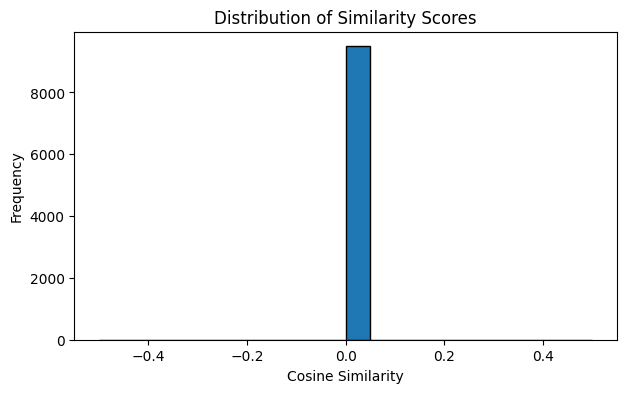

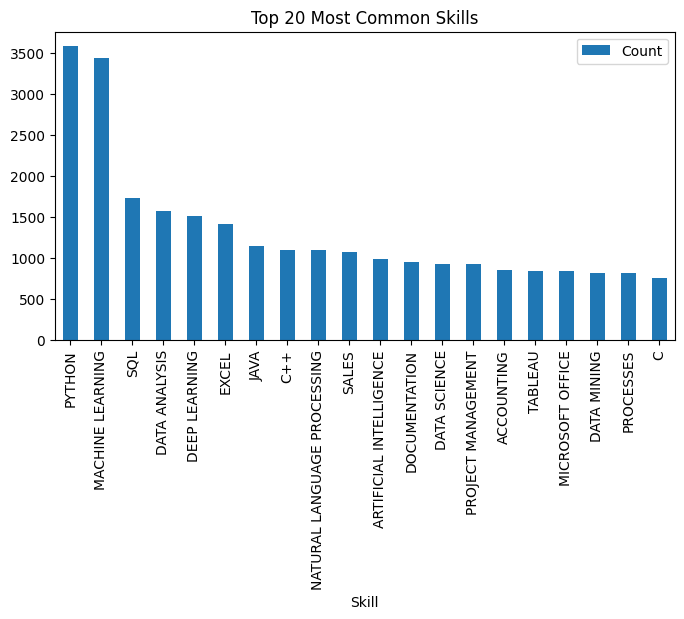

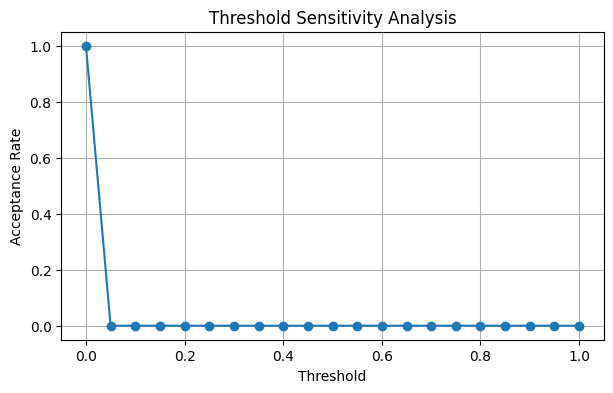

Results saved to accepted_candidates_tfidf.csv and ranked_candidates_tfidf.csv


In [ ]:
 import ast
 from typing import List, Iterable
 import pandas as pd
 import numpy as np
 from sklearn.feature_extraction.text import TfidfVectorizer
 from sklearn.metrics.pairwise import cosine_similarity
 from collections import Counter
 import matplotlib.pyplot as plt
 from rapidfuzz import process, fuzz
 import os
 # %% Cell 2 - Config
 CSV_PATH = 'Math_Final_CSV_cleaned.csv'
 USER_SKILLS_INPUT = input("Enter User Skill: ")
 THRESHOLD = 0.25
 TOP_N = 10
 # %% Cell 3 - Helper functions
 def safe_parse_skills(skills_field) -> List[str]:
    if pd.isnull(skills_field):
        return []
    if isinstance(skills_field, (list, tuple, set)):
        raw = list(skills_field)
    elif isinstance(skills_field, str):
        s = skills_field.strip()
        if s.startswith('[') and s.endswith(']'):
            try:
                parsed = ast.literal_eval(s)
                raw = list(parsed) if isinstance(parsed, (list, tuple, set)) else [s]
            except Exception:
                raw = [x for x in s.split(',')]
        else:
            raw = [x for x in s.split(',')]
    else:
        try:
            raw = list(skills_field)
        except Exception:
            return []
    cleaned, seen = [], set()
    for item in raw:
        token = str(item).strip().upper()
        if token and token not in seen:
            seen.add(token)
            cleaned.append(token)
    return cleaned
 def comma_tokenizer(doc: str) -> List[str]:
    if not isinstance(doc, str):
        return []
    return [t.strip() for t in doc.split(',') if t.strip()]
 # Synonym normalization dictionary
 SYNONYMS = {
    'ML': 'MACHINE LEARNING',
    'DL': 'DEEP LEARNING',
    'AI': 'ARTIFICIAL INTELLIGENCE',
    'JS': 'JAVASCRIPT',
    'PANDAS': 'PYTHON PANDAS'
 }
 def normalize_synonyms(skills: List[str]) -> List[str]:
    normalized = []
    for skill in skills:
        if skill in SYNONYMS:
            normalized.append(SYNONYMS[skill])
        else:
            normalized.append(skill)
    return normalized
 def fuzzy_expand(skills: List[str], vocab: List[str], cutoff: int = 90) -> List[str]:
    expanded = set(skills)
    for skill in skills:
        matches = process.extract(skill, vocab, scorer=fuzz.token_sort_ratio, limit=3)
        for match, score, _ in matches:
            if score >= cutoff:
                expanded.add(match)
    return list(expanded)
 if not os.path.exists(CSV_PATH):
    raise FileNotFoundError(f"CSV file not found at {CSV_PATH}. Upload it to Colab or update the path.")
 df = pd.read_csv(CSV_PATH)
 if 'skills' not in df.columns:
    raise KeyError("Missing 'skills' column in dataset.")
 parsed_skills = df['skills'].apply(safe_parse_skills)
 parsed_skills = parsed_skills.apply(normalize_synonyms)
 df['skills_list'] = parsed_skills
 df['skills_doc'] = parsed_skills.apply(lambda lst: ', '.join(lst))
 print(f"Loaded {len(df)} candidates.")

 def preprocess_user_skills(user_input: str) -> List[str]:
    raw = [x for x in user_input.split(',')]
    cleaned, seen = [], set()
    for item in raw:
        token = str(item).strip().upper()
        if token and token not in seen:
            seen.add(token)
            cleaned.append(token)
    return normalize_synonyms(cleaned)
 user_skills_list = preprocess_user_skills(USER_SKILLS_INPUT)
 user_skills_doc = ', '.join(user_skills_list)
 print(f"User Skills: {user_skills_list}")
 vectorizer = TfidfVectorizer(tokenizer=comma_tokenizer, lowercase=False)
 all_docs = list(df['skills_doc'].astype(str).values)
 all_docs.append(user_skills_doc)
 X = vectorizer.fit_transform(all_docs)

 user_vec = X[-1]
 candidate_vecs = X[:-1]
 cosine_scores = cosine_similarity(candidate_vecs, user_vec).reshape(-1)
 df['skill_similarity_score_cosine'] = np.round(cosine_scores, 4)
 def compute_matched_skills(user_list, candidate_list):
    return sorted(list(set(user_list).intersection(set(candidate_list))))
 df['matched_skills'] = df['skills_list'].apply(lambda lst: compute_matched_skills(user_skills_list, lst))

 # Check if any score is above the threshold and print the message
 if (df['skill_similarity_score_cosine'] >= THRESHOLD).any():
    print("\nYour application is accepted!")
 else:
    print("\nYour application is rejected.")

 accepted_df = df[df['skill_similarity_score_cosine'] >= THRESHOLD].copy()
 accepted_df = accepted_df.sort_values('skill_similarity_score_cosine', ascending=False)
 ranked_df = df.sort_values('skill_similarity_score_cosine', ascending=False).head(TOP_N)
 display_cols = ['name', 'skills_list', 'skill_similarity_score_cosine', 'matched_skills']
 print("\nTop Ranked Candidates:")
 print(ranked_df[display_cols].to_string(index=False))
 print("\nAccepted Candidates:")
 print(accepted_df[display_cols].head(20).to_string(index=False))
 plt.figure(figsize=(7,4))
 plt.hist(df['skill_similarity_score_cosine'], bins=20, edgecolor='k')
 plt.title('Distribution of Similarity Scores')
 plt.xlabel('Cosine Similarity')
 plt.ylabel('Frequency')
 plt.show()
 all_skills = [s for lst in df['skills_list'] for s in lst]
 common_skills = Counter(all_skills).most_common(20)
 common_df = pd.DataFrame(common_skills, columns=['Skill', 'Count'])
 common_df.plot.bar(x='Skill', y='Count', figsize=(8,4), title='Top 20 Most Common Skills')
 plt.show()
 thresholds = np.linspace(0,1,21)
 accept_rates = [(t, (df['skill_similarity_score_cosine'] >= t).mean()) for t in thresholds]
 ths, rates = zip(*accept_rates)
 plt.figure(figsize=(7,4))
 plt.plot(ths, rates, marker='o')
 plt.title('Threshold Sensitivity Analysis')
 plt.xlabel('Threshold')
 plt.ylabel('Acceptance Rate')
 plt.grid(True)
 plt.show()
 accepted_df.to_csv('accepted_candidates_tfidf.csv', index=False)
 df.sort_values('skill_similarity_score_cosine', ascending=False).to_csv('ranked_candidates_tfidf.csv', index=False)
 print('Results saved to accepted_candidates_tfidf.csv and ranked_candidates_tfidf.csv')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_strings(list1, list2):
    """
    Calculate cosine similarity between two string vectors (lists of strings).
    Example:
        list1 = ['PYTHON', 'MACHINE LEARNING', 'DEEP LEARNING']
        list2 = ['DATA SCIENCE', 'MACHINE LEARNING', 'PYTHON']
    """
    # join each list into a single "document"
    docs = [' '.join(list1), ' '.join(list2)]

    # convert text to word count vectors
    vectorizer = CountVectorizer()
    vectors = vectorizer.fit_transform(docs)

    # compute cosine similarity
    similarity = cosine_similarity(vectors[0:1], vectors[1:2])[0][0]
    return similarity


# Example usage
A = ['PYTHON', 'MACHINE LEARNING', 'DEEP LEARNING', 'R', 'SQL', 'EXCEL']
B = ['BIG DATA', 'HADOOP', 'HIVE', 'PYTHON', 'MAPREDUCE', 'SPARK', 'JAVA',
     'MACHINE LEARNING', 'CLOUD', 'HDFS', 'YARN', 'CORE JAVA', 'DATA SCIENCE',
     'C++', 'DATA STRUCTURES', 'DBMS', 'RDBMS', 'INFORMATICA', 'TALEND',
     'AMAZON REDSHIFT', 'MICROSOFT AZURE']

similarity_score = cosine_similarity_strings(A, B)
print(f"Cosine Similarity: {similarity_score:.6f}")


Cosine Similarity: 0.225374


In [ ]:
df1 = pd.read_csv("ranked_candidates_tfidf.csv")
df1.head()

,name,skills,degree_names,major_field_of_studies,professional_company_names,related_skils_in_job,positions,experience_in_years,matched_score,skills_list,skills_doc,skill_similarity_score_cosine,matched_skills
0,Anya,"['JAVA', 'SPRING', 'JAVASCRIPT', 'CSS', 'HTML'...",['Bachelor of Science'],['Computer Science'],"['Genesis10', 'Novalsys, Inc']","[['Java', 'Kotlin', 'Android Development', 'Pe...","['Android Developer Intern', 'Android Develope...",6.5,0.716667,"['JAVA', 'SPRING', 'JAVASCRIPT', 'CSS', 'HTML'...","JAVA, SPRING, JAVASCRIPT, CSS, HTML, REST APIS...",0.0,[]
1,Zara,"['AUTOMATION', 'BUDGET', 'INTERPERSONAL', 'COM...",NaN,NaN,"['Company Name', 'Company Name', 'Company Name...","[['engineering management', 'facility manageme...","['Facilities Engineering Manager', 'Field Engi...",5.0,0.716667,"['AUTOMATION', 'BUDGET', 'INTERPERSONAL', 'COM...","AUTOMATION, BUDGET, INTERPERSONAL, COMPUTER LI...",0.0,[]
2,Sachin,"['ELECTRONIC & MECHANICAL TECHNOLOGY', 'MAINTE...","['MBA', 'Bachelor of Science', 'Associate of S...","['N/A', 'Professional Aeronautics', 'Airframe ...","['Company Name', 'Company Name', 'Company Name']","[['Project Management', 'Engineering', 'Techni...","['Engineering Project Manager III', 'Field Eng...",3.0,0.750000,"['ELECTRONIC & MECHANICAL TECHNOLOGY', 'MAINTE...","ELECTRONIC & MECHANICAL TECHNOLOGY, MAINTENANC...",0.0,[]
3,Pulkit,"['C', 'R', 'CATIA', 'AUTOCAD', 'ANSYS', 'MICRO...","['Master of Science', 'Bachelor of Engineering']","['Manufacturing Systems Engineering', 'Mechani...","['Company Name', 'Company Name']","[[""Delphi's SPQVC"", 'APQP', 'PFMEA', 'lean man...","['Engineering Assistant', 'Engineer']",3.5,0.883333,"['C', 'R', 'CATIA', 'AUTOCAD', 'ANSYS', 'MICRO...","C, R, CATIA, AUTOCAD, ANSYS, MICROSOFT OFFICE,...",0.0,[]
4,Jahnvi,"['MICROSOFT OFFICE', 'MICROSOFT PROJECT', 'PRO...",['Bachelor of Science'],['Mechanical Engineering'],"['N/A', 'Company Name', 'Company Name']","[['Team management', 'Personnel management', '...","['Engineering Manager', 'Project Engineer II',...",15.0,0.750000,"['MICROSOFT OFFICE', 'MICROSOFT PROJECT', 'PRO...","MICROSOFT OFFICE, MICROSOFT PROJECT, PRODUCT D...",0.0,[]
